In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/insurance.csv")
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [4]:
df.shape

(1340, 10)

In [5]:
pd.set_option("display.float_format","{:.2f}".format)

In [6]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [7]:
print(f"Duplicated values: {df.duplicated().sum().item()}")

Duplicated values: 0


In [8]:
print(f"Total null values: {df.isna().sum().sum()}")
df.isna().sum()

Total null values: 8


Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.shape

(1332, 10)

In [10]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00
mean,674.47,38.09,30.66,94.19,1.10,13325.25
std,384.70,11.11,6.12,11.45,1.21,12109.62
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,341.75,29.00,26.20,86.00,0.00,4760.16
50%,674.50,38.00,30.35,92.00,1.00,9412.97
75%,1007.25,47.00,34.73,99.00,2.00,16781.33
max,1340.00,60.00,53.10,140.00,5.00,63770.43


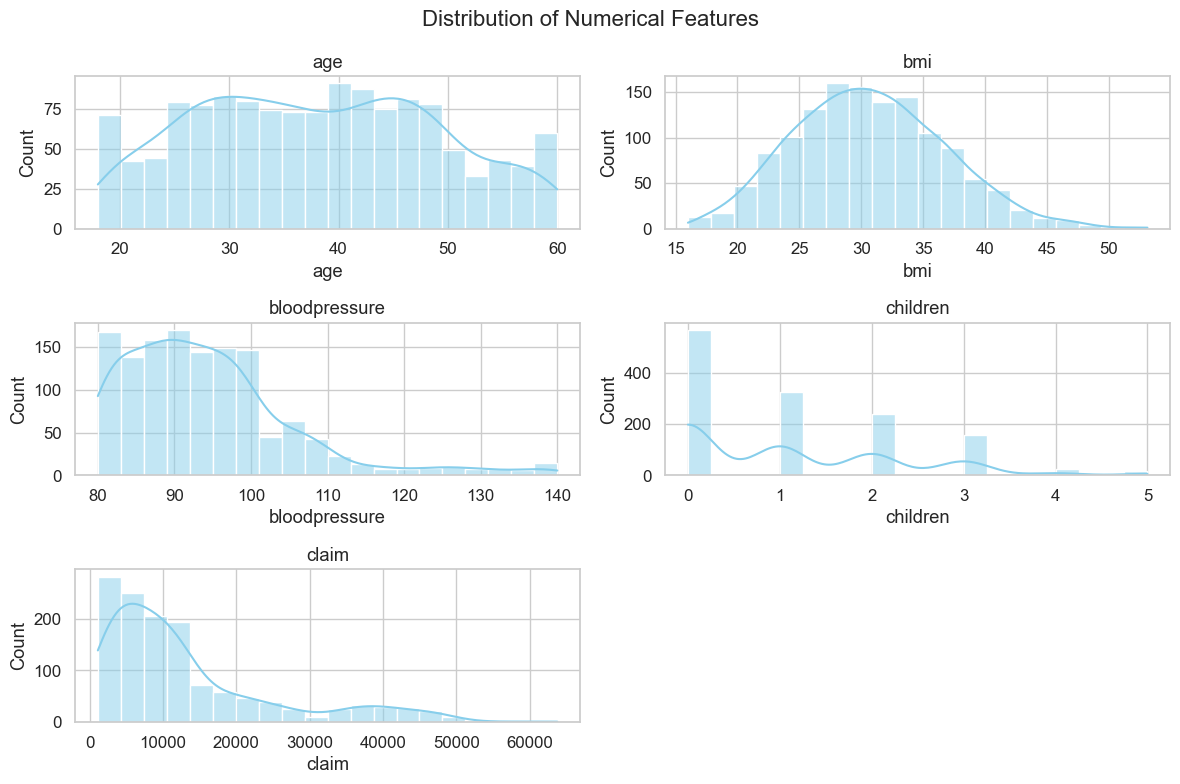

In [11]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df, x=col, bins=20, kde=True, color='skyblue')
    plt.title(col)

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

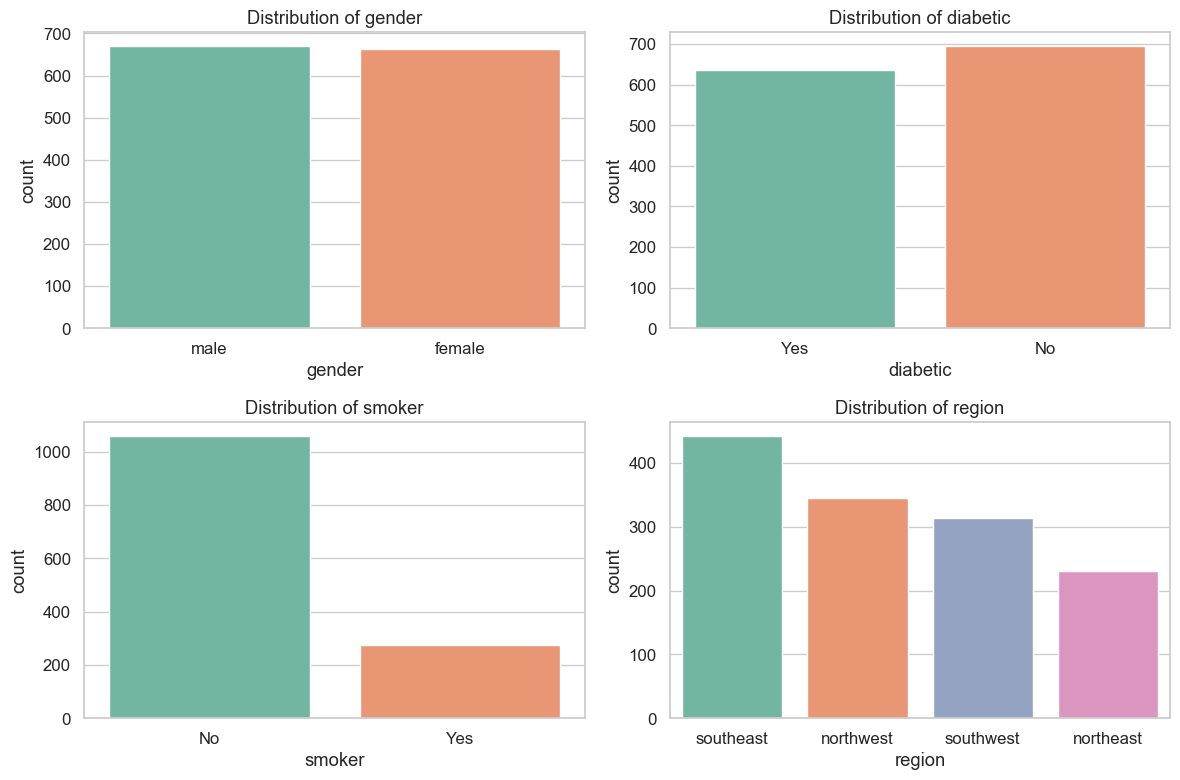

In [12]:
cat_cols = ["gender", "diabetic", "smoker", "region"]

plt.figure(figsize=(12,8))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col, hue=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [13]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

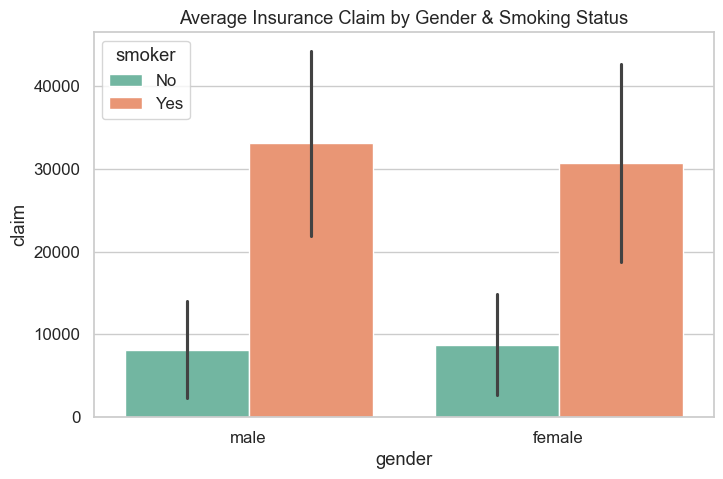

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="gender", y="claim", hue="smoker", estimator=np.mean, errorbar="sd")
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [15]:
pivot_region_diabetic = df.pivot_table(
    values="claim",
    index="region",
    columns="diabetic",
    aggfunc="mean"
)


In [16]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


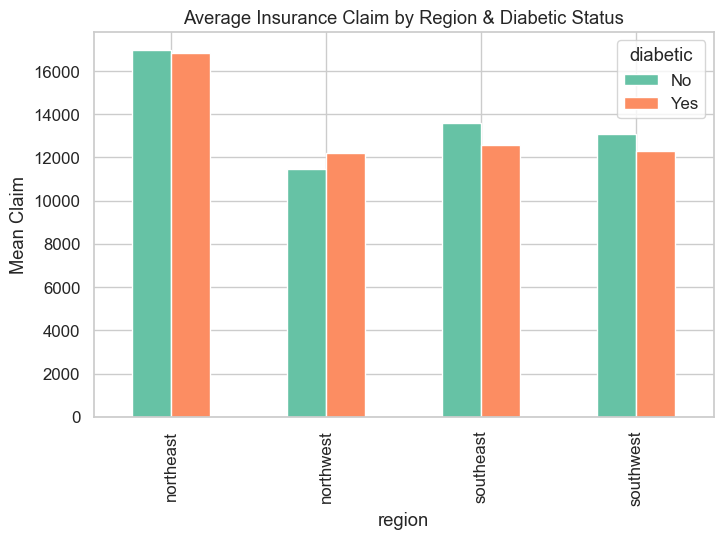

In [17]:
pivot_region_diabetic.plot(kind="bar", figsize=(8,5))
plt.title("Average Insurance Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [18]:
pivot_table = pd.pivot_table(df, index="region", columns="smoker", values="claim", aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [19]:
pivot_table = pd.pivot_table(df, values="claim", index="children", columns="diabetic", aggfunc="mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [20]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

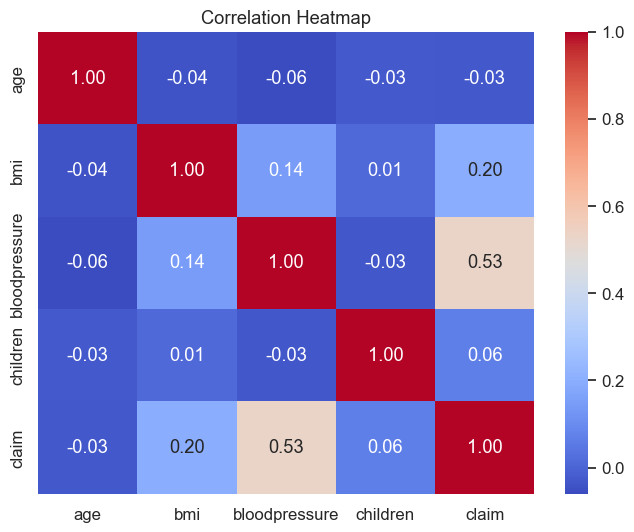

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

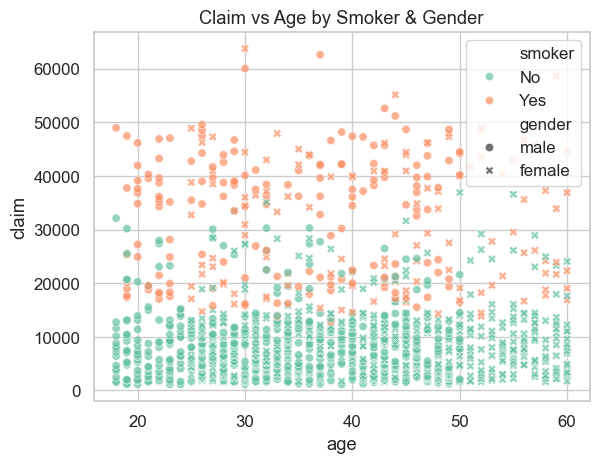

In [22]:
sns.scatterplot(data = df, x = "age", y = "claim", hue = "smoker", style="gender", alpha=0.7)
plt.title("Claim vs Age by Smoker & Gender")
plt.show()

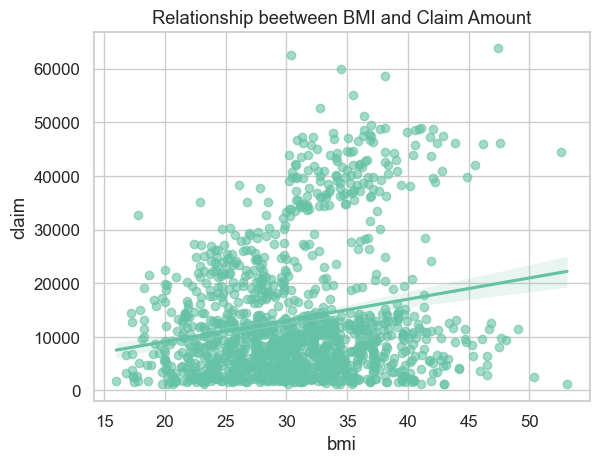

In [23]:
sns.regplot(data = df, x = "bmi", y = "claim", scatter_kws={"alpha": 0.6})
plt.title("Relationship beetween BMI and Claim Amount")
plt.show()

Text(0.5, 1.0, 'Claim Distribution by Number of Children')

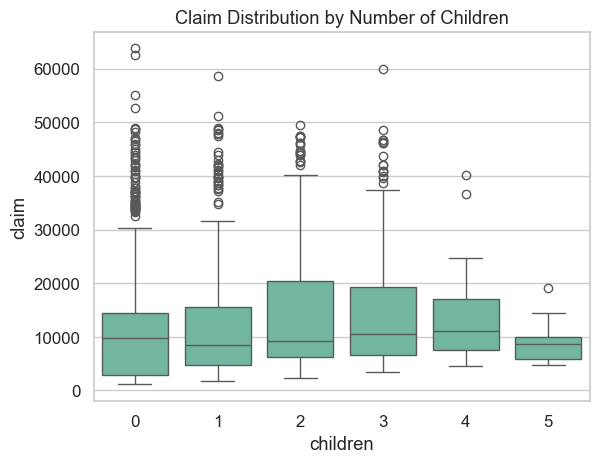

In [24]:
sns.boxplot(data = df, x="children", y="claim")
plt.title("Claim Distribution by Number of Children")

In [25]:
df["age_group"] = pd.cut(df["age"], bins = [0, 18, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-60", "60+"])
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30


In [26]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

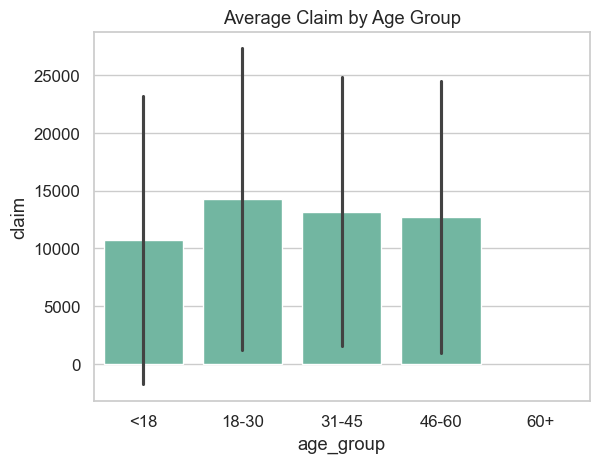

In [27]:
sns.barplot(data = df, x = "age_group", y = "claim", estimator="mean", errorbar="sd")
plt.title("Average Claim by Age Group")
plt.show()

In [28]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])

In [29]:
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

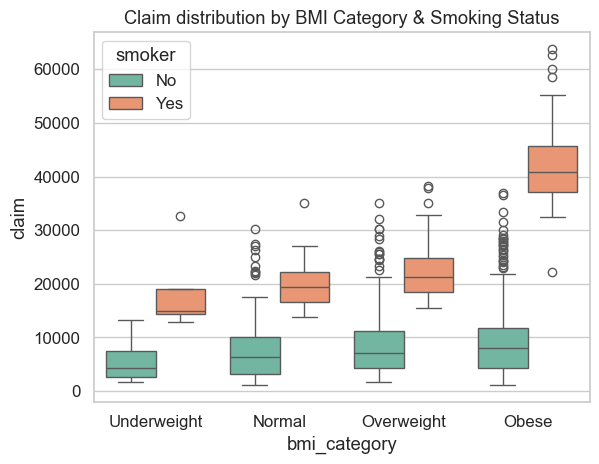

In [30]:
sns.boxplot(data = df, x = "bmi_category", y = "claim", hue="smoker")
plt.title("Claim distribution by BMI Category & Smoking Status")
plt.show()

In [31]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean()*100),
    mean_claim = ("claim", "mean")
).reset_index()

In [32]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


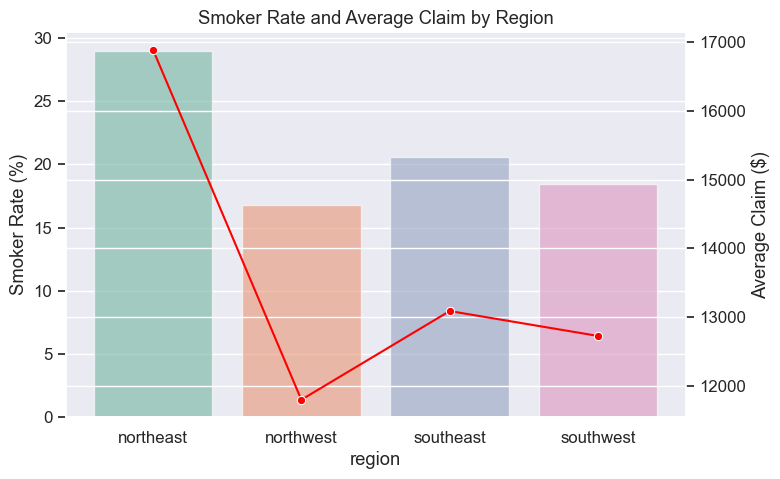

In [33]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data = region_stats, x="region", y="smoker_rate", hue="region", ax=ax1, alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(data = region_stats, x="region", y="mean_claim", ax=ax2, color = "red", marker="o")

ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate and Average Claim by Region")
plt.show()

In [34]:
df.to_csv("data/data_without_null_values.csv", index=False)